## 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity

#### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [5]:
#Import Data
path =r'C:\Users\north\10-2024 Exploring Chocolate Bar Quality\02 Data\Prepared Data'
df_cacao=pd.read_csv(os.path.join(path,'cleaned_cacao_data_mapped_clustered.csv'))

In [6]:
df_cacao.head()

,Unnamed: 0,Company,Bean Origin,Reference,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Region_Final,Cluster
0,0,A. Morin,Agua Grande,1876.0,2016,0.63,France,3.75,Unknown,São Tomé and Principe,São Tomé and Principe,Purple
1,1,A. Morin,Kpime,1676.0,2015,0.70,France,2.75,Unknown,Togo,Togo,Purple
2,2,A. Morin,Atsane,1676.0,2015,0.70,France,3.00,Unknown,Togo,Togo,Purple
3,3,A. Morin,Akata,1680.0,2015,0.70,France,3.50,Unknown,Togo,Togo,Purple
4,4,A. Morin,Quilla,1704.0,2015,0.70,France,3.50,Unknown,Peru,Peru,Purple


**Note: Using "Review Date" as time-series data.**

#### 2. Subsetting, wrangling, and cleaning time-series data

In [9]:
# Check the initial structure and date range of the dataset
print("Initial Date Range:")
print(df_cacao['Review Date'].min(), "to", df_cacao['Review Date'].max())

Initial Date Range:
2006 to 2017


**There doesn't appear to be any data from irrelevant or historical events that would bias the analysis since all years fall within a reasonable timeframe for modern chocolate reviews. Therefore, I don’t see a need to remove any specific years.**
ysis.
nger
nger


In [11]:
# Ensure the 'Review Date' column exists and reset the index to use it
# First, make sure there are no leading/trailing spaces in column names
df_cacao.columns = df_cacao.columns.str.strip()

# Check if the 'Review Date' column exists
if 'Review Date' in df_cacao.columns:
    # Setting the 'Review Date' as the index for time-series analysis
    df_cacao.set_index('Review Date', inplace=True)
    # Sorting the index to ensure it's in chronological order
    df_cacao.sort_index(inplace=True)
    print("Index has been successfully reset to 'Review Date'.")
else:
    print("The 'Review Date' column was not found in the dataset.")

# Display the first few rows to verify the index reset
print(df_cacao.head())


Index has been successfully reset to 'Review Date'.
             Unnamed: 0                        Company            Bean Origin  \
Review Date                                                                     
2006               1420  Santander (Compania Nacional)    Colombian Semi Dark   
2006               1326                         Pralus  Barlovento, Venezuela   
2006               1327                         Pralus               Jamaique   
2006               1328                         Pralus               Equateur   
2006               1329                         Pralus                Vanuatu   

             Reference  Cocoa Percent Company Location  Rating  \
Review Date                                                      
2006              32.0           0.53         Colombia     2.0   
2006              32.0           0.75           France     3.5   
2006              32.0           0.75           France     4.0   
2006              40.0           0.75           Fr

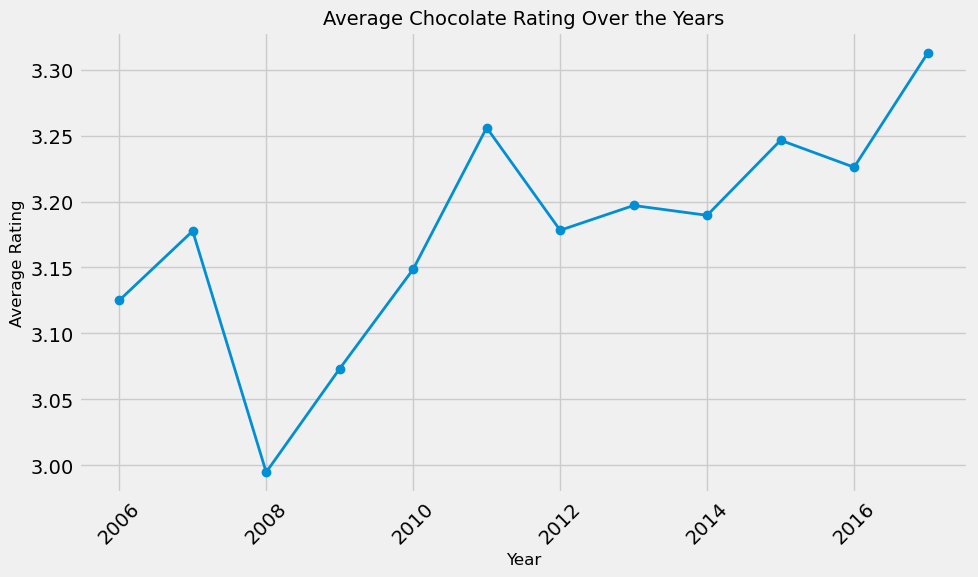

In [12]:
import matplotlib.pyplot as plt

# Group by 'Review Date' and calculate the average rating per year
average_rating_per_year = df_cacao.groupby(df_cacao.index)['Rating'].mean().reset_index()

# Plotting the average chocolate ratings over the years
plt.figure(figsize=(10, 6))
plt.plot(average_rating_per_year['Review Date'], average_rating_per_year['Rating'], marker='o', linestyle='-', linewidth=2)
plt.title('Average Chocolate Rating Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [13]:
# Check for missing values

df_cacao.isnull().sum() 

Unnamed: 0           0
Company              0
Bean Origin          0
Reference            0
Cocoa Percent        0
Company Location     0
Rating               0
Bean Type            0
Broad Bean Origin    0
Region_Final         0
Cluster              0
dtype: int64

In [14]:
# Check for duplicates

dups = df_cacao.duplicated()
dups.sum()

# No dups!

0

### 3. Time-series analysis: decomposition

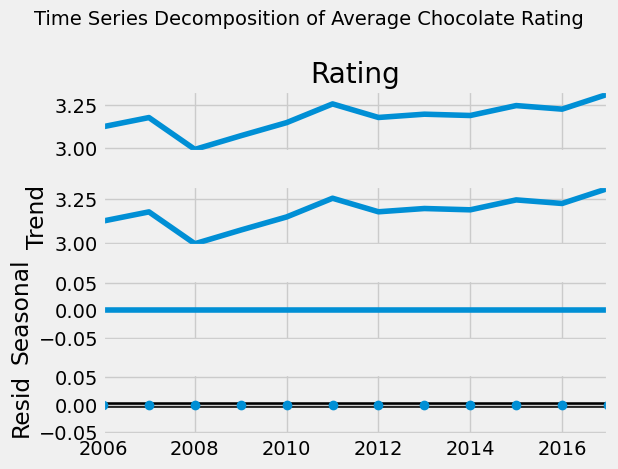

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure 'Review Date' is the index and sorted in chronological order
average_rating_per_year.set_index('Review Date', inplace=True)

# Decomposing the time series data with an annual frequency
decomposition = seasonal_decompose(average_rating_per_year['Rating'], model='additive', period=1)

# Plot the decomposition results
decomposition.plot()
plt.suptitle('Time Series Decomposition of Average Chocolate Rating', fontsize=14)
plt.tight_layout()
plt.show()


### Decomposition Analysis of Average Chocolate Ratings

1. **Trend**: The trend shows a gradual increase in average chocolate ratings from 2006 to 2017, with a dip around 2008, followed by an upward trend. This may indicate improvements in chocolate quality or changing review standards.

2. **Seasonal**: The seasonal component is flat, suggesting no seasonal pattern in the data, which aligns with expectations as chocolate ratings are unlikely to vary seasonally.

3. **Residual**: The residual component is minimal, indicating that most of the data’s variability is captured by the trend, with little unexplained noise 

### Conclusion
The trend is the dominant component, with negligible seasonal and residual influences. This points to a consistent improvement in chocolate quality ratings over time.


#### 4. Testing for stationarity

In [33]:
from statsmodels.tsa.stattools import adfuller

# Conducting the Augmented Dickey-Fuller test to check for stationarity
result = adfuller(average_rating_per_year['Rating'])

# Extracting and displaying the test results
adf_output = {
    'Test Statistic': result[0],
    'p-value': result[1],
    'Number of Lags Used': result[2],
    'Number of Observations': result[3],
    'Critical Values': result[4]
}

# Print the results
print("ADF Test Results:")
for key, value in adf_output.items():
    print(f"{key}: {value}")


ADF Test Results:
Test Statistic: -1.1906585799365137
p-value: 0.6776011906832332
Number of Lags Used: 3
Number of Observations: 8
Critical Values: {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}


### Dickey-Fuller Test Interpretation

- **Null Hypothesis**: The series is non-stationary.
- **Test Statistic**: -1.19
- **p-value**: 0.68
- **Critical Values**: 
  - 1%: -4.67
  - 5%: -3.37
  - 10%: -2.80

Since the **p-value (0.68) is greater than 0.05**, we fail to reject the null hypothesis, indicating that the data is **not stationary**. Additionally, the test statistic (-1.19) is higher than the critical values at all significance levels (1%, 5%, and 10%), further confirming non-stationarity.


In [37]:
# First differencing to make the data stationary
diff_data = average_rating_per_year['Rating'].diff().dropna()

# Conducting ADF test again on the differenced data
result_diff = adfuller(diff_data)

# Display the ADF results after differencing
adf_output_diff = {
    'Test Statistic': result_diff[0],
    'p-value': result_diff[1],
    'Number of Lags Used': result_diff[2],
    'Number of Observations': result_diff[3],
    'Critical Values': result_diff[4]
}

print("\nADF Test Results After First Differencing:")
for key, value in adf_output_diff.items():
    print(f"{key}: {value}")



ADF Test Results After First Differencing:
Test Statistic: -5.75636995950597
p-value: 5.807150927239091e-07
Number of Lags Used: 2
Number of Observations: 8
Critical Values: {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}


### Dickey-Fuller Test Interpretation After First Differencing

- **Test Statistic**: -5.76
- **p-value**: 5.81e-07 (close to 0)
- **Critical Values**:
  - 1%: -4.67
  - 5%: -3.37
  - 10%: -2.80

Since the **p-value (5.81e-07) is much lower than 0.05**, we reject the null hypothesis and conclude that the differenced data is **stationary**. Additionally, the test statistic (-5.76) is lower than all critical values at the 1%, 5%, and 10% levels, confirming stationarity.


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 10 must be < 5.

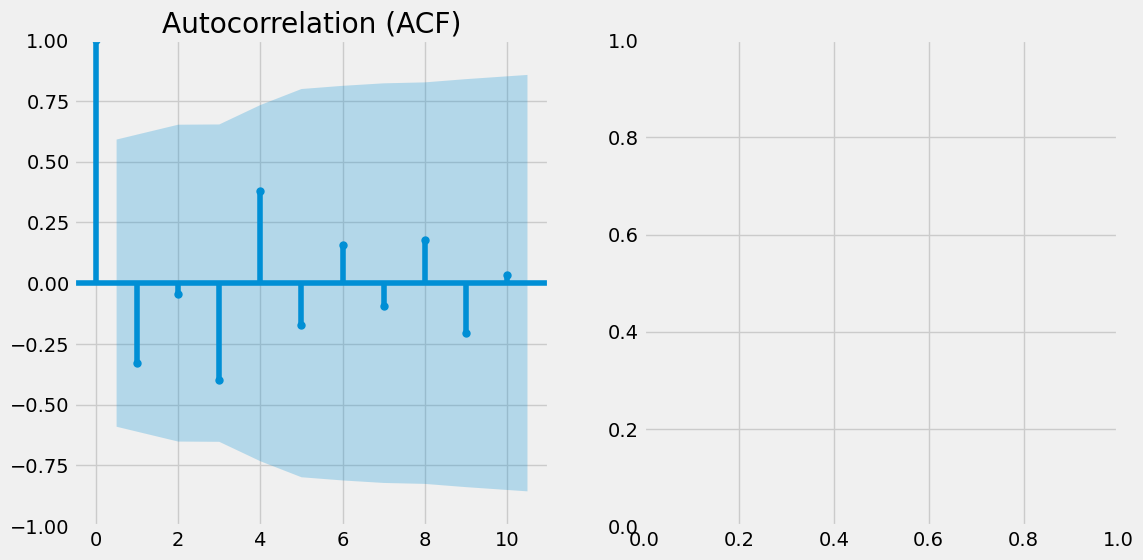

In [40]:
#Check data’s autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(diff_data, lags=10, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(diff_data, lags=10, ax=plt.gca())
plt.title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()


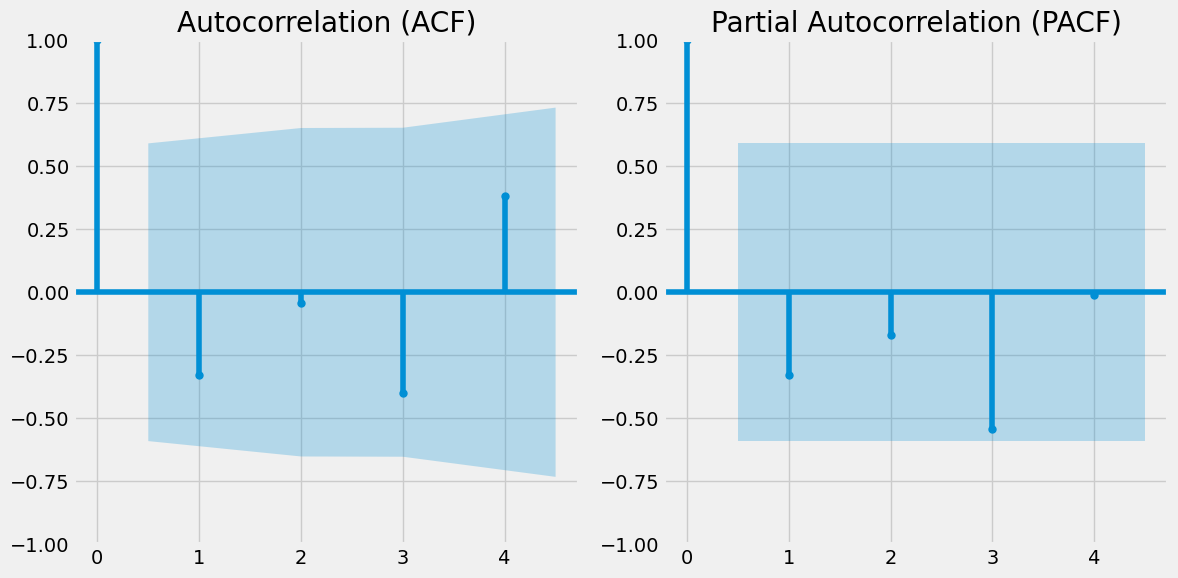

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced data with reduced lags
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(diff_data, lags=4, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(diff_data, lags=4, ax=plt.gca())
plt.title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()
